In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from seaborn import sns
from sklearn.preprocessing import LabelEncoder

from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway

In [138]:
df = pd.read_csv('hotel_bookings.csv')
df.head(8)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03


# DATA EXPLORATION

In [7]:
df.shape

(119390, 32)

In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# DATA CLEANING

In [14]:
# HANDLING MISSING DATA
missing = df.isnull().sum()
missing[missing > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [16]:
perce = df.isnull().mean()*100
missing_perce = perce[perce>0]
missing_perce

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

In [18]:
'''The Company column has the highest missing percentage (~94%) ---->imputation or removal
agent col has ~14% missing data '''

In [140]:
df = df.drop(['company'],axis=1)

In [22]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [24]:
df['agent'].median()

14.0

In [142]:
df.agent=df.agent.fillna(14.0)

In [28]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

In [326]:
df['country'].mode()

0    PRT
Name: country, dtype: object

In [ ]:
'''While handling Null values in Country col, we can either fill it with the mode i.e 'PRT' can distort:
Country-based revenue analysis.

Guest origin segmentation.

Marketing insights.
-----------------------------------------
to drop country col will cause in loosing vast amount of data


In [144]:
df.country = df.country.fillna('unknown')

In [34]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [36]:
df.children.median()

0.0

In [146]:
df.children = df.children.fillna(0)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [114]:
# HADLING DUPLICATE DATA RECORDS
df.duplicated().sum()

32001

In [340]:
df[df.duplicated()]   # look for duplicate values

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,0,No Deposit,250.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,0,No Deposit,240.0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,0,No Deposit,240.0,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,0,No Deposit,9.0,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [148]:
df=df.drop_duplicates()

In [118]:
df.duplicated().sum()

0

In [150]:
# PARSING DATE COLUMN
df['arrival_date']=pd.to_datetime(df[['arrival_date_year','arrival_date_month','arrival_date_day_of_month']].astype(str).agg('-'.join,axis=1))

In [151]:
df.drop(['arrival_date_year','arrival_date_month','arrival_date_day_of_month'],axis=1,inplace=True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87389 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87389 non-null  object        
 1   is_canceled                     87389 non-null  int64         
 2   lead_time                       87389 non-null  int64         
 3   arrival_date_week_number        87389 non-null  int64         
 4   stays_in_weekend_nights         87389 non-null  int64         
 5   stays_in_week_nights            87389 non-null  int64         
 6   adults                          87389 non-null  int64         
 7   children                        87389 non-null  float64       
 8   babies                          87389 non-null  int64         
 9   meal                            87389 non-null  object        
 10  country                         87389 non-null  object        
 11  market

In [126]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<Axes: >

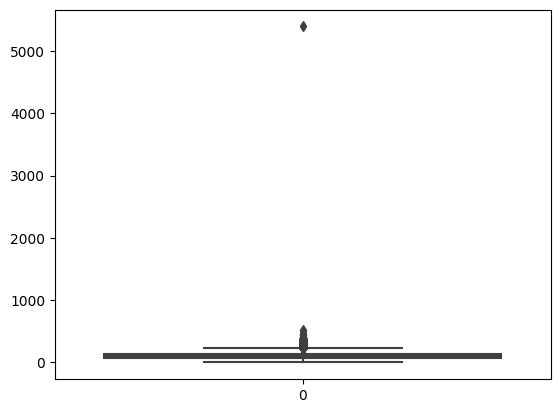

In [155]:
sns.boxplot(df['adr']) #-------------------------> OUTLIERS

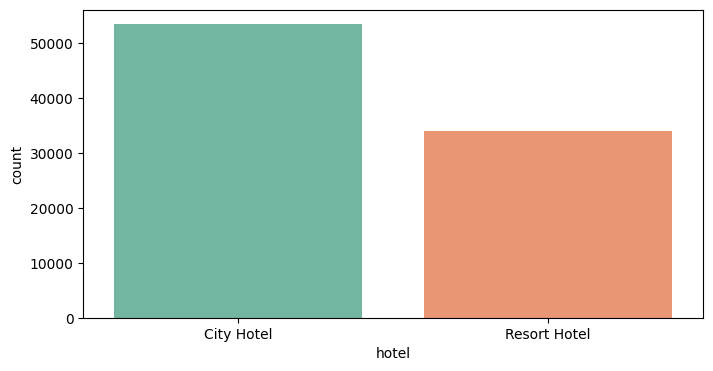

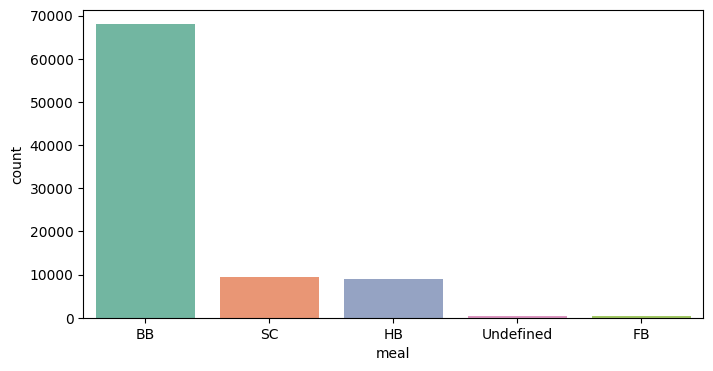

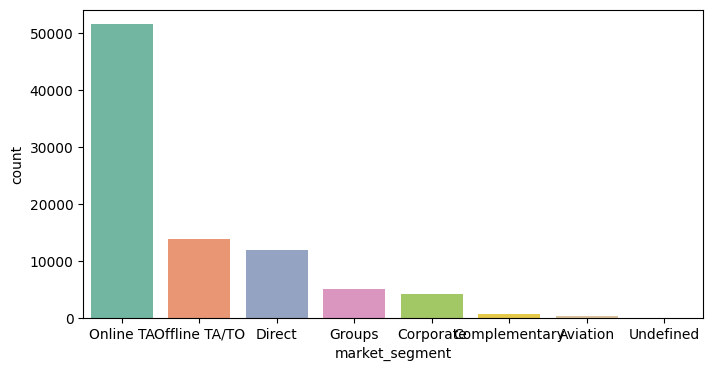

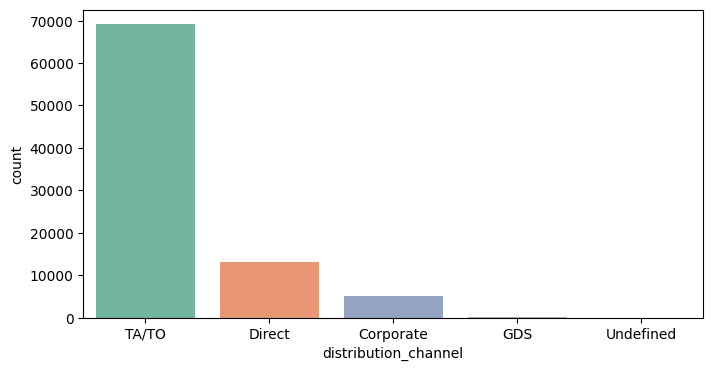

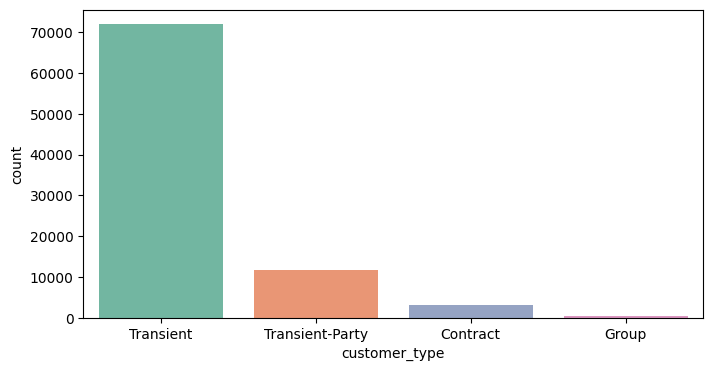

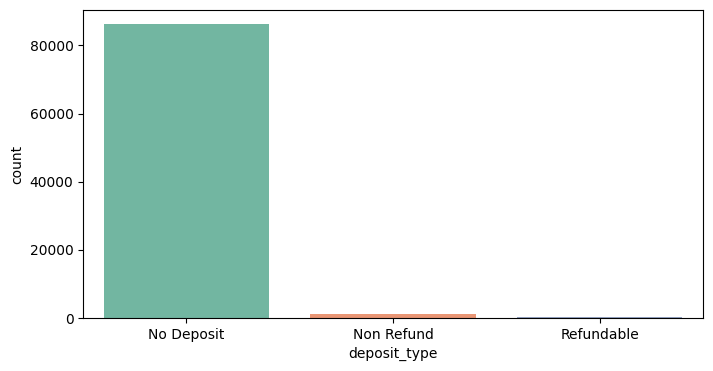

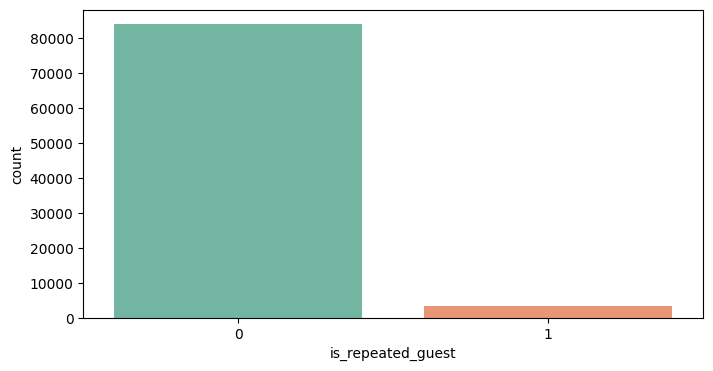

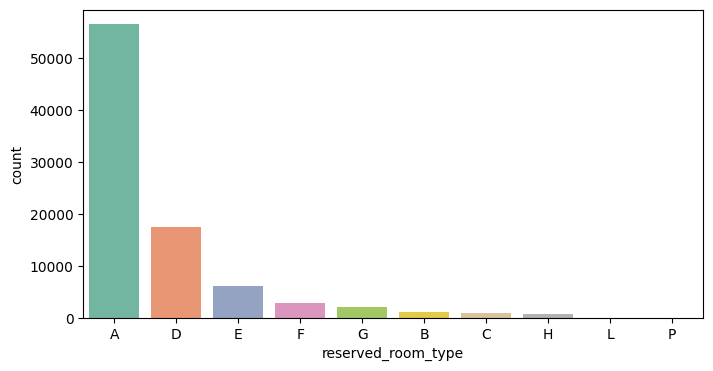

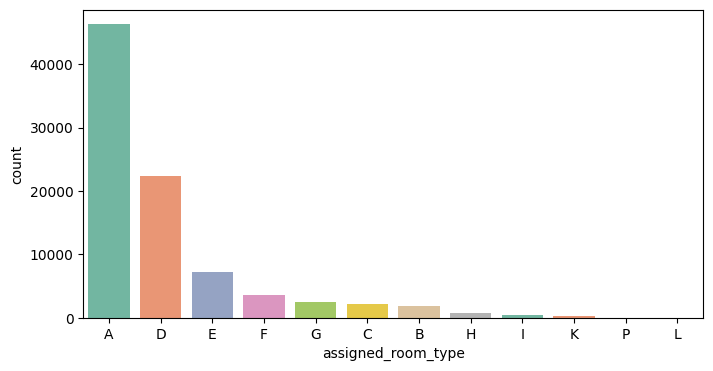

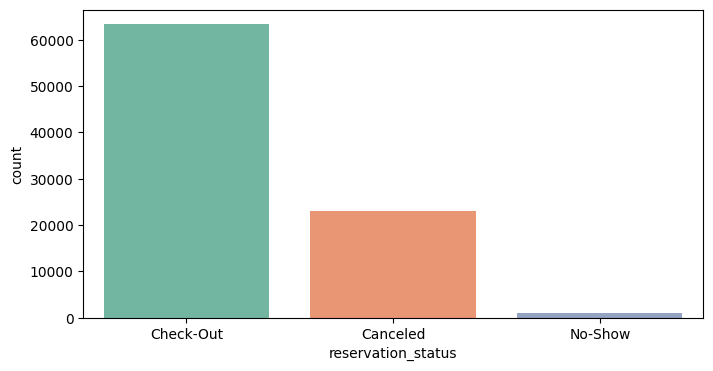

In [157]:
# UIVARIATE ANALYSIS
cat_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type',
            'deposit_type', 'is_repeated_guest', 'reserved_room_type',
            'assigned_room_type', 'reservation_status']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], palette='Set2', order=df[col].value_counts().index)

# Convert categorical variables
- this enum is required bcoz the model can't correlate with categorical features
  while making prediction/decision.
- 🔹 1. Group Rare Countries as “Other”
- 🔹 2. One-Hot Encoding post Grouping
- 🔹 3. Label Encoding
- 🔹 4. Target Encoding (predicting ADR)

In [159]:
cat_cols = df.select_dtypes(include='object').columns    #Identify categorical columns
cat_cols

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [62]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [64]:
df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'unknown', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KN

In [161]:
top_count = df['country'].value_counts().nlargest(10)
top_count

country
PRT    27449
GBR    10432
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
Name: count, dtype: int64

In [163]:
df['grouped_countries'] = df['country'].apply(lambda x: x if x in top_count else 'other')

In [ ]:
'''
we have ~180{high cardinality} unique countries registered, but while encoding the categorical variable
it increases the DIMENSIONALITY. so as to reduce the noise and avoid inefficiency in
the model, we will SELECT TOP 10 countries{highest number of bookings},
rest we will treat as OTHERS{grouping}
'''

In [165]:
df=pd.get_dummies(df,columns = ['grouped_countries'],drop_first=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,grouped_countries_BRA,grouped_countries_DEU,grouped_countries_ESP,grouped_countries_FRA,grouped_countries_GBR,grouped_countries_IRL,grouped_countries_ITA,grouped_countries_NLD,grouped_countries_PRT,grouped_countries_other
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,False,False,False,False,False,False,False,False,True,False
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,False,False,False,False,False,False,False,False,True,False
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,False,False,False,False,True,False,False,False,False,False
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,False,False,False,False,True,False,False,False,False,False
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,False,False,False,False,True,False,False,False,False,False


<Axes: >

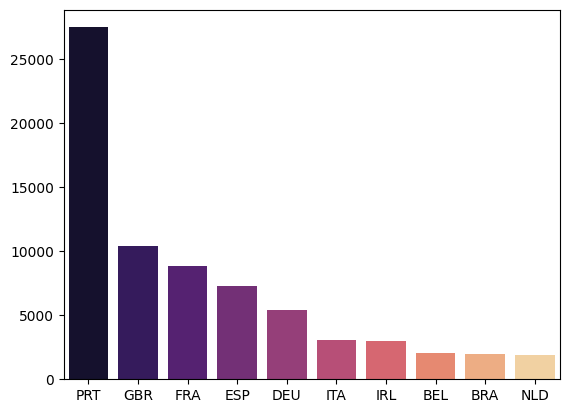

In [167]:
sns.barplot(x=top_count.index.tolist(),y=top_count.values,palette='magma')

In [169]:
df.shape

(87389, 39)

In [171]:
#Label Encoding --------> High-cardinality columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['reservation_status','reserved_room_type','assigned_room_type']:
    df[col]=df[col].astype(str)
    df[col] = le.fit_transform(df[col])

#one-hot encoding----------> Low-cardinality columns
df = pd.get_dummies(df,columns=['hotel','meal','deposit_type','customer_type','market_segment','distribution_channel'], drop_first=True)

In [173]:
df.shape

(87389, 54)

In [ ]:
'''
reservation_status_date should be there in date format, perhaps...
we will convert it to datetime

In [175]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [177]:
df.drop('country',axis=1,inplace=True)

In [179]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [ ]:
''' INSIGHTS: all the variables with data type:object, have been handle using label
encoding{High-cardinality columns} and One-hot-encoding{low-cardinality columns}
'''

In [181]:
df.shape

(87389, 53)

In [ ]:
# TARGET ENCODING: PREDICTING ADR
# country_target_mean = df.groupby('grouped_countries')['adr'].mean()
# df['country_target_enc'] = df['grouped_countries'].map(country_target_mean)


# Create Derived Fields
- GOAL is to build new, meaningful features from existing ones to enhance exploratory analysis, modeling, or hypothesis testing.
- 
- to surface new insights like guest behavior, seasonal trends, or revenue drivers
- 

In [183]:
#1 Total stay duration ----------> reflects how long guest stayed in Total
df['stay_total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

#2 Total guests --------> captures party size for demographics or revenue analysis
df['total_guests'] = df['adults'] + df['children'] + df['babies']

#3 Weekend stay indicator -------> flags booking with weekend impact(useful for pricing strategy or cancellation analysis)
df['is_weekend_stay'] = df['stays_in_weekend_nights'].apply(lambda x: 1 if x > 0 else 0)

#4 Room upgrade flag ---> to identify guests whose room asg changed,link to agent behavior or loyalty,complaints
df['room_upgraded']=(df['reserved_room_type']!=df['assigned_room_type']).astype(int)

#5 Booking Gap -------> assess planning behavior or predict cancellations
df['booking_gap']=(df['arrival_date']-pd.to_datetime(df['reservation_status_date'])).dt.days

#6 ADR per person per ni8 -----> normalize revenue and avoid distortion in analysis from large bookings
df['adr_per_person']=df['adr']/df['total_guests'].replace(0,1)
df['adr_per_night']=df['adr']/df['stay_total_nights'].replace(0,1)

In [185]:
df.shape

(87389, 60)

# 2. EXPLORATORY DATA ANALYSIS (EDA)
- Univariate{numerical(histograms,box plots/KDE plots) & categorical(count plot)}
- bivariate 
- multivariate

- Time-series analysis of booking trends.
Guest demographics and distribution by country.
Market segment share and ADR (Average Daily Rate) comparison.
Booking lead time distribution across customer types

<Axes: xlabel='adr'>

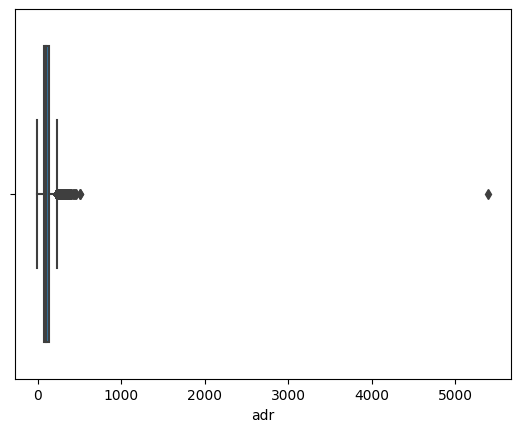

In [213]:
sns.boxplot(x=df['adr'])

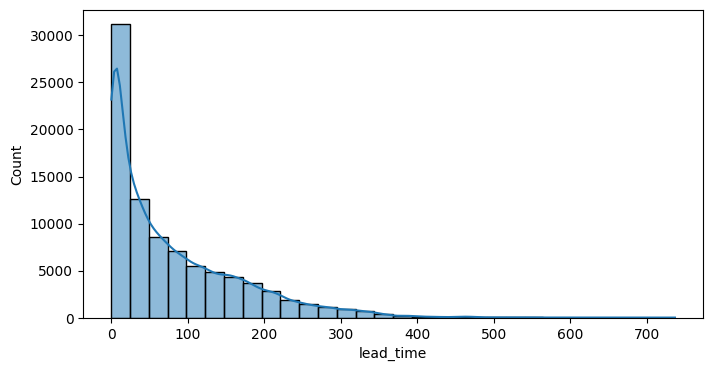

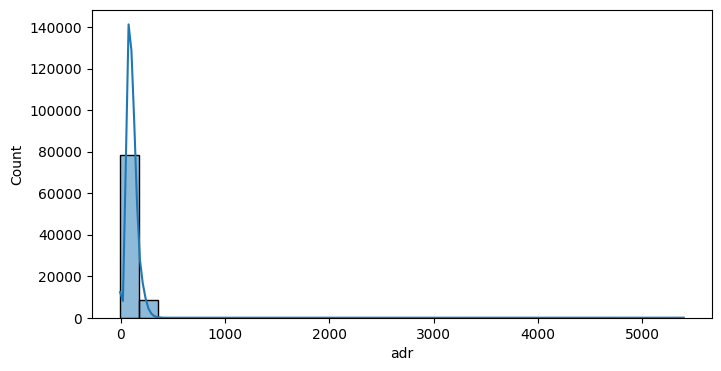

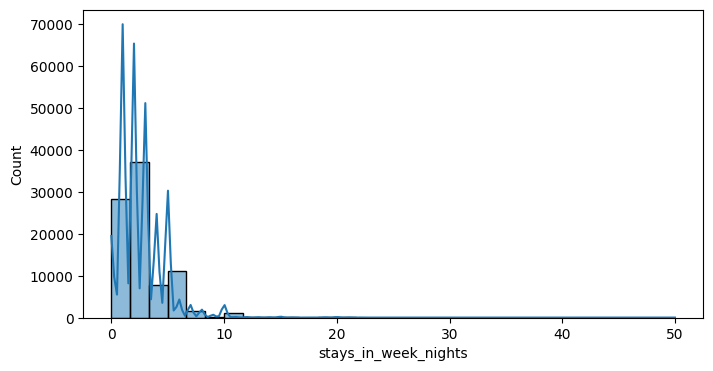

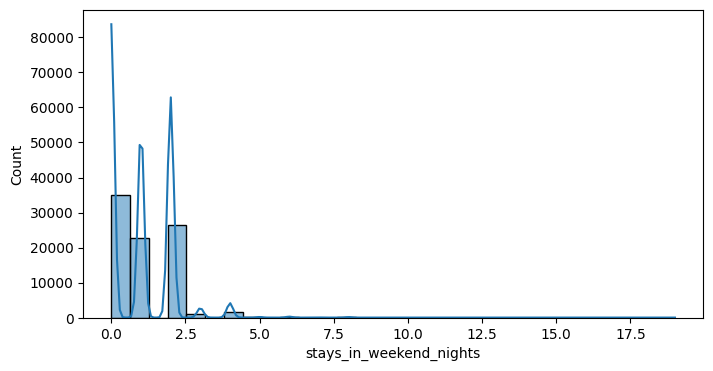

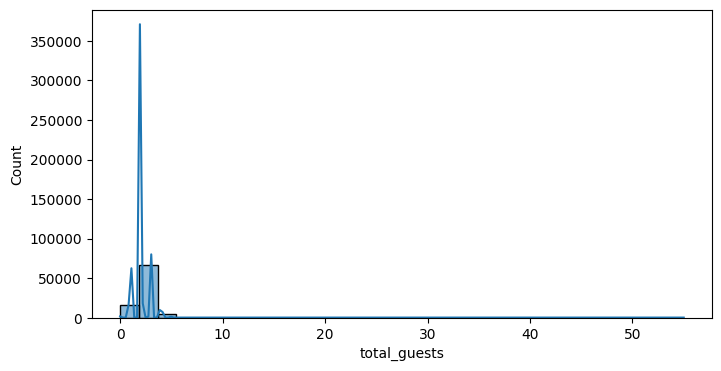

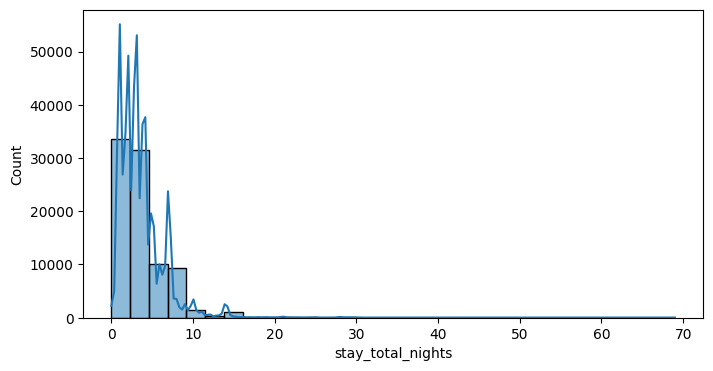

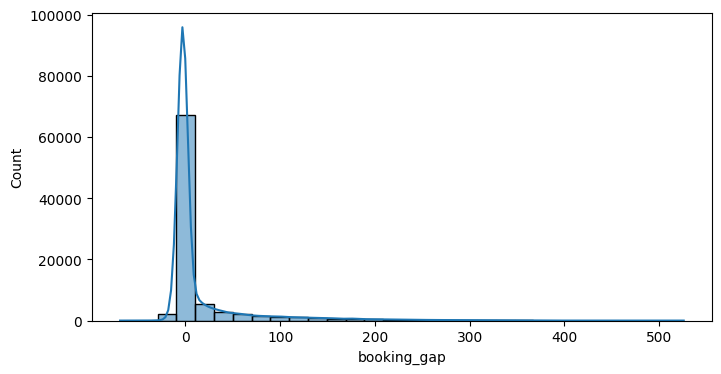

In [187]:
# NUMERIC ANALYSIS
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = ['lead_time', 'adr', 'stays_in_week_nights', 'stays_in_weekend_nights',
            'total_guests', 'stay_total_nights', 'booking_gap']
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)

In [195]:
# Bivariate Analysis
# one categorical and one numeric, or two numeric ones.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87389 entries, 0 to 119389
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   is_canceled                     87389 non-null  int64         
 1   lead_time                       87389 non-null  int64         
 2   arrival_date_week_number        87389 non-null  int64         
 3   stays_in_weekend_nights         87389 non-null  int64         
 4   stays_in_week_nights            87389 non-null  int64         
 5   adults                          87389 non-null  int64         
 6   children                        87389 non-null  float64       
 7   babies                          87389 non-null  int64         
 8   is_repeated_guest               87389 non-null  int64         
 9   previous_cancellations          87389 non-null  int64         
 10  previous_bookings_not_canceled  87389 non-null  int64         
 11  reserv

<Axes: xlabel='hotel_Resort Hotel', ylabel='adr'>

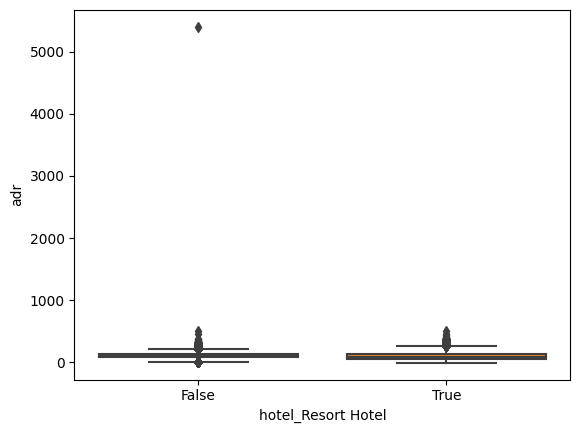

In [202]:
# 1. ADR vs Hotel Type
sns.boxplot(x='hotel_Resort Hotel',y='adr',data=df)

In [ ]:
'''Boxplot Interpretation:
This shows price patterns between City Hotel & Resort Hotel.
City Hotel (False) vs Resort Hotel (True)
----> ADR is slightly higher for City Hotels
--> IQR (box): Spread of ADR is more compressed for both, but Resort has slightly larger spread.

===> OUTLIERS
-------------> city hotel has fewer extreme ADR, indicates offer more stable & predictable price range.
-------------> resort hotel, few booking with ADR>5000,indicates high pricing variation(seasonal pricing)
'''

<Axes: xlabel='deposit_type_Non Refund', ylabel='adr'>

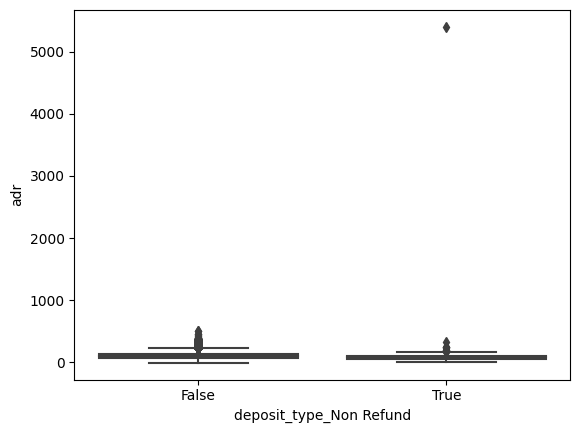

In [204]:
# 2. ADR vs Deposit Type
sns.boxplot(x='deposit_type_Non Refund', y='adr',data=df)

In [ ]:
'''
Non-refundable bookings have higher ADR
 The median ADR (the thick line inside the box) is slightly higher for True (non-refundable) than for False

 Outliers present in both, but fewer in non-refundable
 - Refundable (False) has more extreme ADR values.
 - suggest more variability in pricing for refundable deals 

 Tighter spread for non-refundable
 - Non-refundable bookings show less variance, which suggests stable pricing strategy
 

- Non-refundable = premium or assured revenue, hence hotels can justify higher price tags.
- Recommend encouraging non-refundable bookings with value-adds to increase stable revenue.
- Could explore further if certain customer types or channels prefer non-refundable deals (e.g., corporate clients?).

In [220]:
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

<Axes: xlabel='market_segment_Online TA', ylabel='is_canceled'>

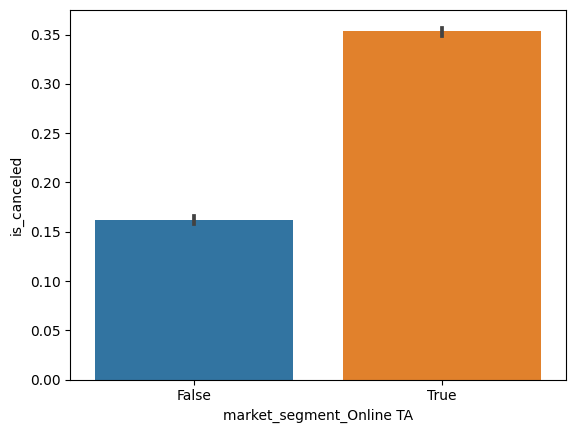

In [224]:
# 3.Cancellation Rate by Market Segment
sns.barplot(x='market_segment_Online TA',y='is_canceled',data=df)

<Axes: xlabel='lead_time', ylabel='adr'>

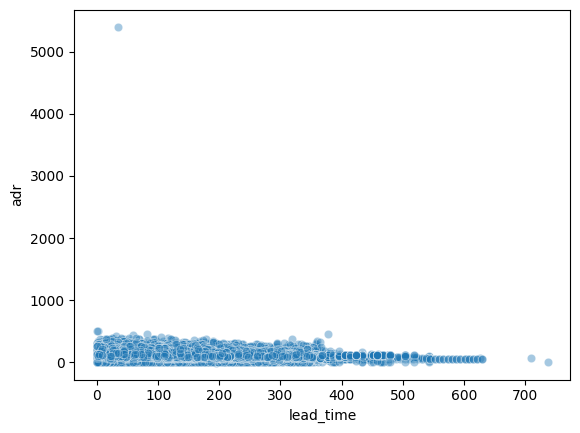

In [226]:
sns.scatterplot(x='lead_time',y='adr',data=df,alpha=0.4)

In [ ]:
' Lead Time vs. ADR (Numeric vs. Numeric)'
# Do early bookings lead to cheaper or costlier stays

In [233]:
# special requests vs room upgrades
# sns.boxplot(x='total_of_special_requests',y='room_upgraded',data=df)

<Axes: xlabel='market_segment_Online TA', ylabel='adr'>

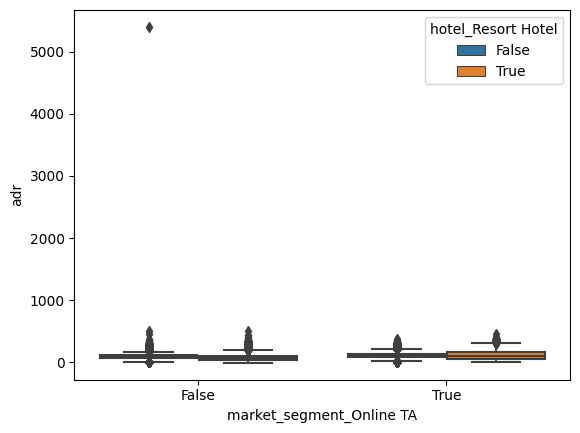

In [246]:
sns.boxplot(data=df, x='market_segment_Online TA', y='adr', hue='hotel_Resort Hotel')

C:\Users\user5\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


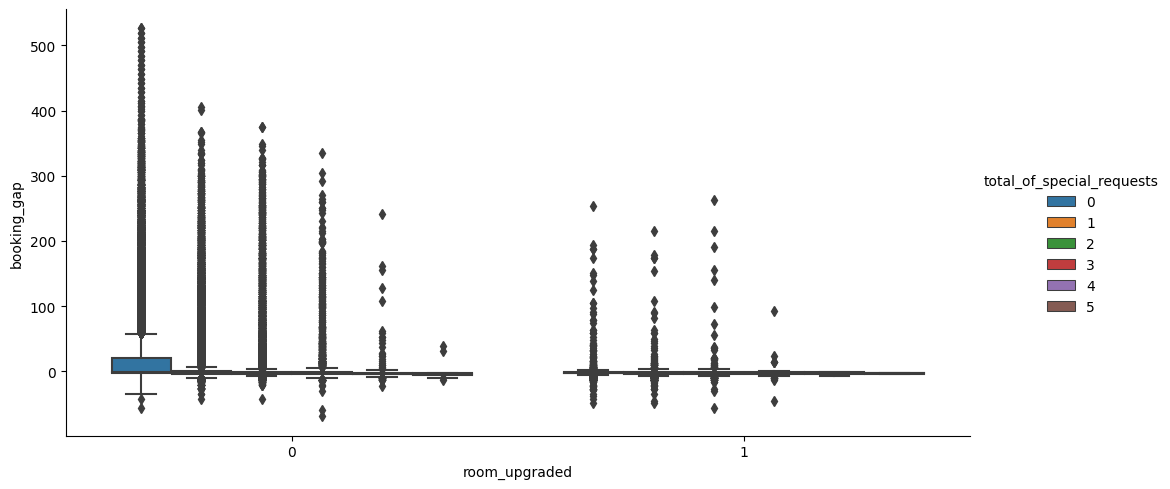

In [248]:
sns.catplot(data=df, x='room_upgraded', y='booking_gap', hue='total_of_special_requests', kind='box', height=5, aspect=2)

In [ ]:
'''Are Booking Gaps Longer for Guests Who Get Room Upgrades and Make Special Requests?
This explores how well-prepared or demanding guests behave around check-in

<Axes: xlabel='is_canceled', ylabel='lead_time'>

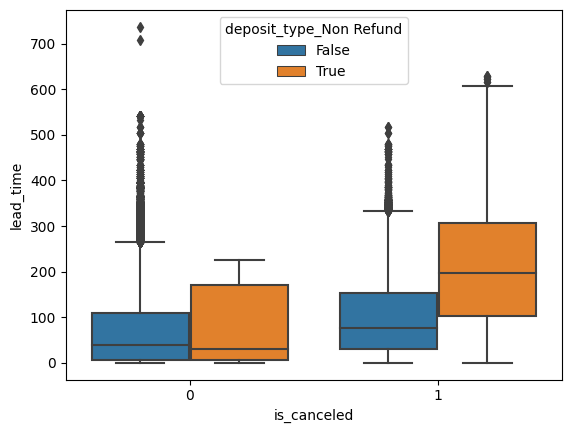

In [250]:
# Lead Time, Cancellations, and Deposit Type
sns.boxplot(data=df, x='is_canceled', y='lead_time', hue='deposit_type_Non Refund')

In [ ]:
'Helps you see if guests with non-refundable deposits cancel less—even when they book far in advance.'

<Axes: xlabel='total_guests', ylabel='adr'>

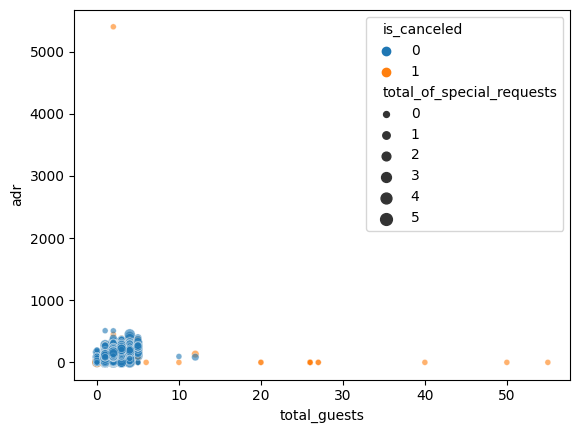

In [252]:
# Total Guests vs ADR vs Special Requests
sns.scatterplot(data=df, x='total_guests', y='adr', size='total_of_special_requests', hue='is_canceled', alpha=0.6)

In [ ]:
'A multivariate scatterplot showing how party size, guest spending, and request load influence bookings.'

<Axes: >

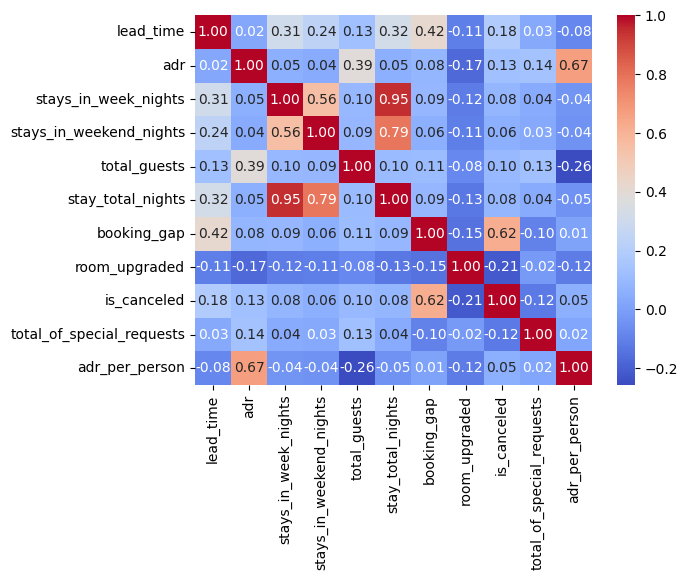

In [263]:
num_cols = ['lead_time', 'adr', 'stays_in_week_nights', 'stays_in_weekend_nights',
            'total_guests', 'stay_total_nights', 'booking_gap','room_upgraded','is_canceled','total_of_special_requests','adr_per_person']
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")

# Time Series Analysis of Booking Trends

<Axes: xlabel='arrival_month'>

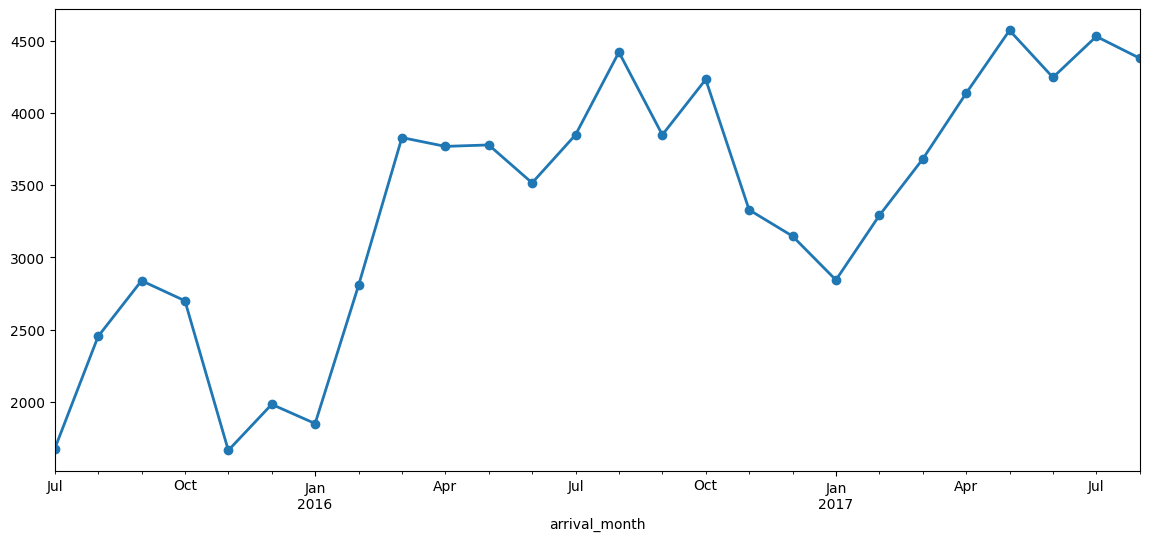

In [272]:
# Extract month and year from arrival_date
df['arrival_month'] = df['arrival_date'].dt.to_period('M')

# Count bookings per month
monthly_bookings = df.groupby('arrival_month').size()
monthly_bookings.plot(figsize=(14, 6), marker='o', linewidth=2)



In [ ]:
''' Insights: 
for the Year 2017 we can clearly see that there's a high peak during the
month May, whic probably indicates highest bookings due to summer holidays '''

<Axes: xlabel='arrival_date'>

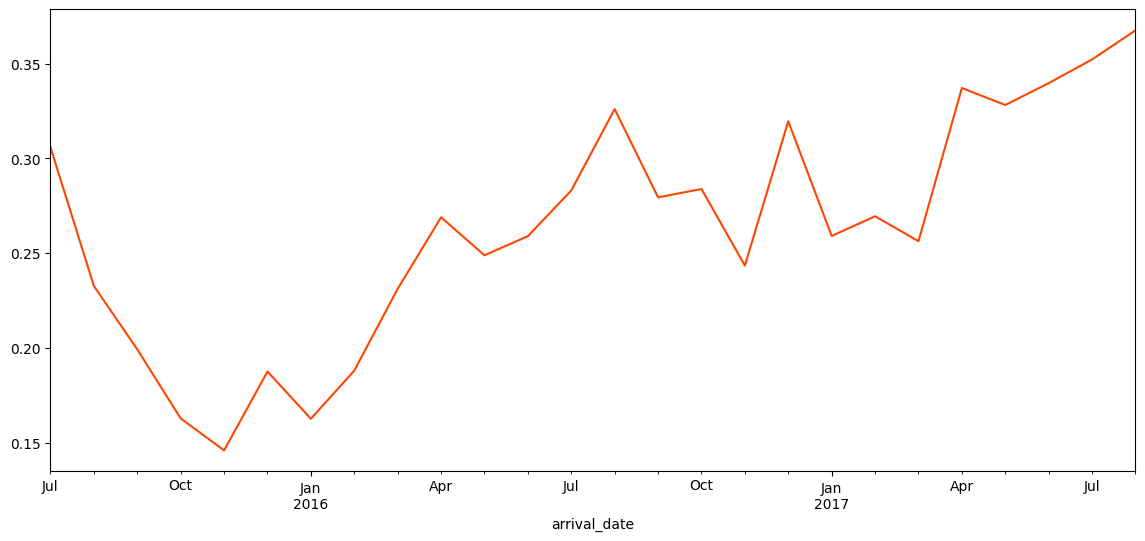

In [274]:
df.groupby(df['arrival_date'].dt.to_period('M'))['is_canceled'].mean().plot(kind='line', figsize=(14,6), color='orangered')

In [ ]:
' shows high cancellation rates'

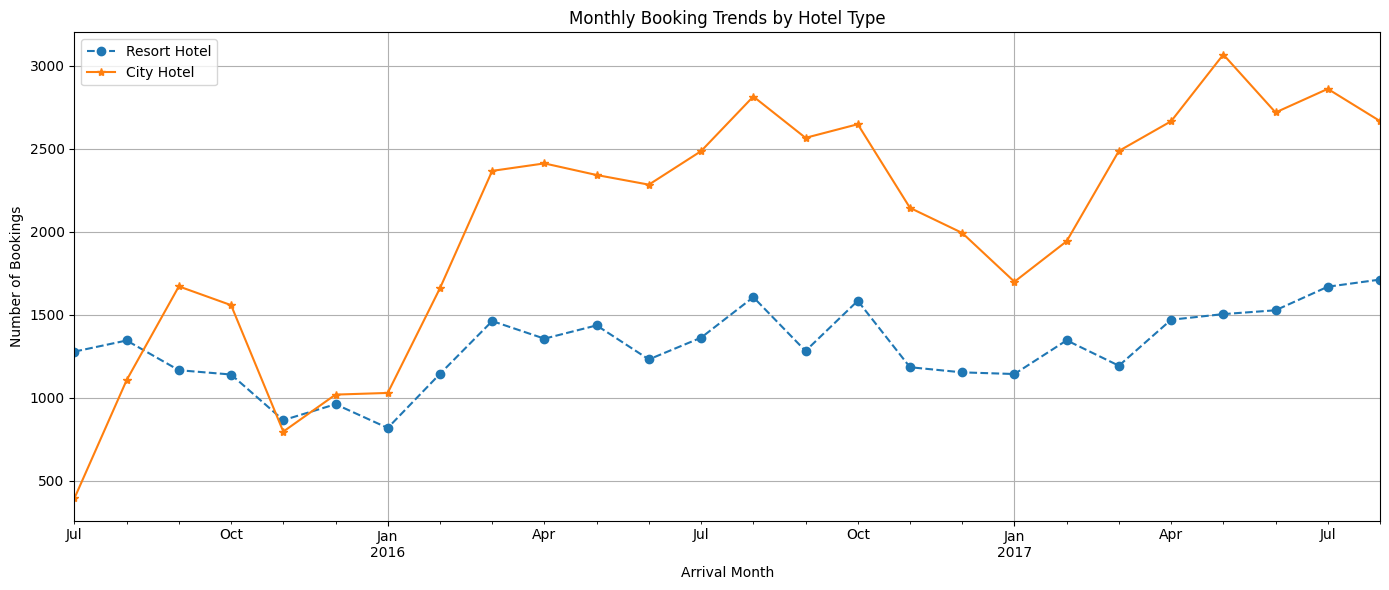

In [278]:
df['arrival_month'] = df['arrival_date'].dt.to_period('M')

resort_trend = df[df['hotel_Resort Hotel'] == True].groupby('arrival_month').size()
city_trend = df[df['hotel_Resort Hotel'] == False].groupby('arrival_month').size()

plt.figure(figsize=(14, 6))
resort_trend.plot(label='Resort Hotel', linestyle='--', marker='o')
city_trend.plot(label='City Hotel', linestyle='-', marker='*')
plt.title("Monthly Booking Trends by Hotel Type")
plt.xlabel("Arrival Month")
plt.ylabel("Number of Bookings")
plt.legend()
plt.grid(True)
plt.tight_layout()

In [ ]:
''' Hotel-Type Specific Trend (City vs Resort Hotel)
city resort shows high trends

'''

In [280]:
# Pearson Correlation Matrix
# changes in one variable align with changes in another.

In [284]:
num_col = df.select_dtypes(include=['int64','float64','bool'])
pearson_corr = num_col.corr(method='pearson')
pearson_corr

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,stay_total_nights,total_guests,is_weekend_stay,booking_gap,adr_per_person,adr_per_night
is_canceled,1.000000,0.184772,0.001469,0.060159,0.082886,0.081775,0.067355,-0.020548,-0.089654,0.051464,...,-0.118573,-0.007758,0.151614,0.008896,0.084059,0.100217,0.051190,0.617466,0.053764,-0.012867
lead_time,0.184772,1.000000,0.101195,0.235109,0.310088,0.140439,0.028630,-0.003620,-0.147021,0.005369,...,-0.133688,-0.031646,0.197780,-0.005001,0.318228,0.126681,0.177134,0.416961,-0.083133,-0.220982
arrival_date_week_number,0.001469,0.101195,1.000000,0.026901,0.027842,0.024429,0.013464,0.014265,-0.036853,0.007202,...,-0.005620,-0.003527,-0.002979,0.002524,0.030735,0.029035,0.028706,0.025845,0.076642,0.030190
stays_in_weekend_nights,0.060159,0.235109,0.026901,1.000000,0.555543,0.088232,0.028545,0.013663,-0.106963,-0.020641,...,-0.065874,-0.017553,0.119191,-0.000039,0.786258,0.087927,0.799059,0.056921,-0.042535,-0.377656
stays_in_week_nights,0.082886,0.310088,0.027842,0.555543,1.000000,0.095519,0.030458,0.016002,-0.113562,-0.018788,...,-0.055949,-0.027482,0.113449,-0.000831,0.950575,0.095108,0.225982,0.087874,-0.039752,-0.445674
adults,0.081775,0.140439,0.024429,0.088232,0.095519,1.000000,0.023691,0.016634,-0.171739,-0.042106,...,-0.015119,-0.057262,0.160239,0.003914,0.103930,0.804695,0.095525,0.097892,-0.247045,0.030472
children,0.067355,0.028630,0.013464,0.028545,0.030458,0.023691,1.000000,0.017421,-0.045656,-0.019210,...,0.033468,-0.013855,0.012190,0.001018,0.033293,0.595117,0.026353,0.058233,-0.094043,0.135679
babies,-0.020548,-0.003620,0.014265,0.013663,0.016002,0.016634,0.017421,1.000000,-0.012979,-0.005395,...,0.048538,-0.004341,-0.033561,-0.000721,0.016994,0.166136,0.012421,-0.015540,-0.060772,-0.002202
is_repeated_guest,-0.089654,-0.147021,-0.036853,-0.106963,-0.113562,-0.171739,-0.045656,-0.012979,1.000000,0.206373,...,0.067972,-0.005291,-0.253617,-0.001525,-0.124333,-0.163514,-0.113031,-0.057587,-0.035308,-0.003632
previous_cancellations,0.051464,0.005369,0.007202,-0.020641,-0.018788,-0.042106,-0.019210,-0.005395,0.206373,1.000000,...,-0.004448,-0.003754,-0.051999,-0.000623,-0.021670,-0.045007,-0.021431,0.047321,-0.016511,-0.014830


In [288]:
# sns.heatmap(pearson_corr,annot=True,fmt='.2f',cmap='coolwarm',square=True)

In [296]:
# spearman_corr = num_col.corr(method='spearman')
# sns.heatmap(spearman_corr,annot=True,fmt='.2f',cmap='YlGnBu',square=True)

In [298]:
corr_with_adr = pearson_corr['adr'].sort_values(ascending=False)
corr_with_adr[['adr', 'lead_time', 'total_of_special_requests', 'booking_changes']]

adr                          1.000000
lead_time                    0.023533
total_of_special_requests    0.137804
booking_changes              0.002540
Name: adr, dtype: float64

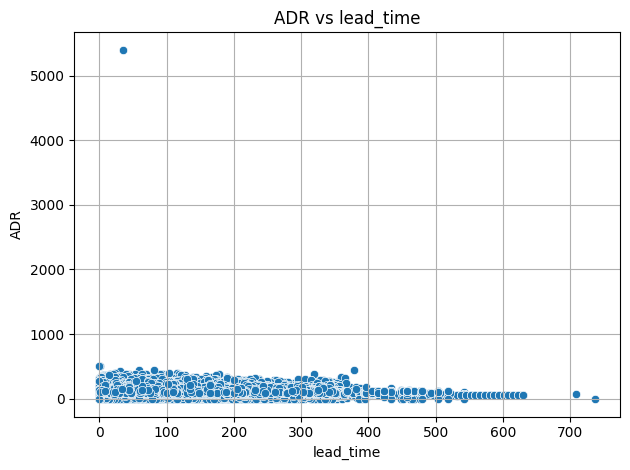

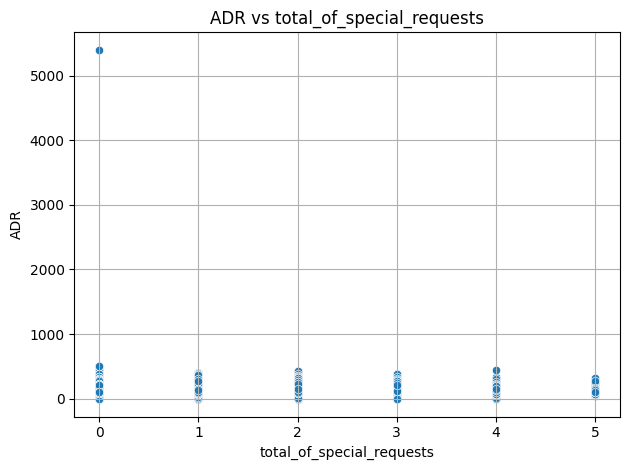

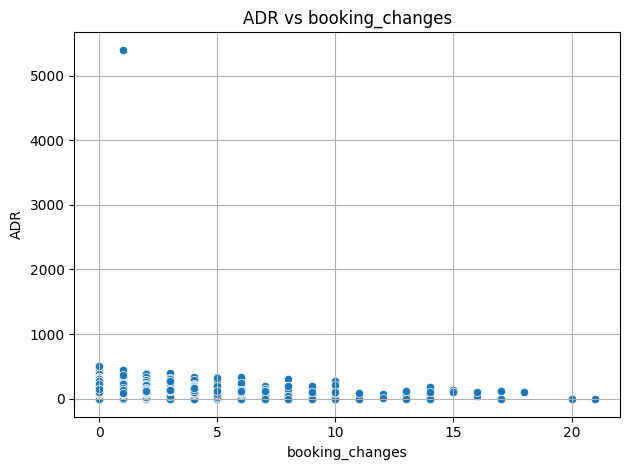

In [300]:
target_cols = ['lead_time', 'total_of_special_requests', 'booking_changes']
for col in target_cols:
    sns.scatterplot(x=df[col], y=df['adr'])
    plt.title(f"ADR vs {col}")
    plt.xlabel(col)
    plt.ylabel("ADR")
    plt.grid(True)
    plt.tight_layout()


# HYPOTHESIS TESTING


In [315]:
# 1. ADR: Online TA vs. Direct Channels
# Ho: No difference in ADR b/w Online TA and Direct channels
# H1: There is a difference
# ------------->as ADR is numeric and booking channels(online TA vs direct)are categorical, 
# -------------> Using TWO SAMPLE T TEST
from scipy.stats import ttest_ind
adr_online=df[df['distribution_channel_TA/TO']==1]['adr']
adr_direct=df[df['distribution_channel_Direct']==1]['adr']

t_stat,p_val = ttest_ind(adr_online,adr_direct,equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

T-statistic: -0.97, P-value: 0.3303


In [ ]:
''' As seen p-value: 0.3303 > 0.05, DO NOT REJECT Ho---->No significance difference

In [320]:
# 2. Room Upgrades Independent of Lead Time
# H₀: Room upgrade is independent of lead time
# H₁: They are dependent
# ----------> lead time is continuous but not normally distributed
# ----------> room upgraded is binary(0/1)
# -------------> U-test

from scipy.stats import mannwhitneyu

lead_up = df[df['room_upgraded'] == 1]['lead_time']
lead_nup = df[df['room_upgraded'] == 0]['lead_time']

u_stat, p_val = mannwhitneyu(lead_up, lead_nup)
print(f"U-statistic: {u_stat:.2f}, P-value: {p_val:.4f}")


U-statistic: 368658317.50, P-value: 0.0000


In [ ]:
'p value:0.00 < 0.05, we Reject Ho -----> lead time impacts upgrades'

In [326]:
# 3. Stay Duration Across Customer Types
# H₀: No difference in average stay duration among customer types
# H₁: At least one differs
# --------> ONE WAY ANOVA
# --------> Stay duration is numerical
# ------>Customer type has >2 categories: Transient, Group, Transient-Party, etc

from scipy.stats import f_oneway

grouped = df.groupby('customer_type_Group')['stay_total_nights'].apply(list)
f_stat, p_val = f_oneway(*grouped)
print(f"F-statistic: {f_stat:.2f}, P-value: {p_val:.4f}")


F-statistic: 36.14, P-value: 0.0000


In [ ]:
'p-value: 0.00 < 0.05, we Reject Ho----->At least one customer group has a different average stay'

<Axes: xlabel='adr'>

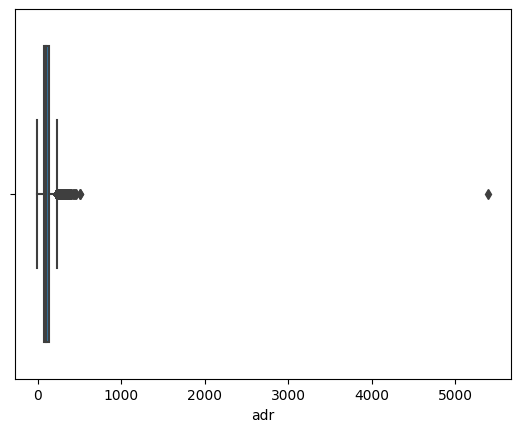

In [330]:
sns.boxplot(x=df['adr'])

In [ ]:
''' we can see there are too many outliers in ADR column
we will handle outliers using IQR, 

In [344]:
q1=df['adr'].quantile(0.25)
q3=df['adr'].quantile(0.75)
IQR=q3-q1

lb=q1-1.5*IQR
ub=q3+1.5*IQR
df_no=df[(df['adr'] >= lb)&(df['adr']<=ub)]

<Axes: xlabel='adr'>

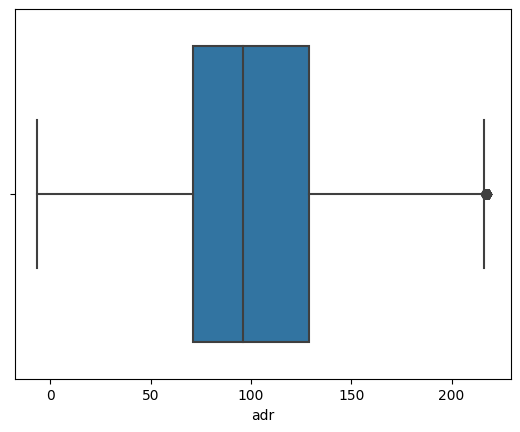

In [346]:
sns.boxplot(x=df_no['adr'])

In [351]:
df=df[df['adr']<500]
df

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,distribution_channel_TA/TO,distribution_channel_Undefined,stay_total_nights,total_guests,is_weekend_stay,room_upgraded,booking_gap,adr_per_person,adr_per_night,arrival_month
0,0,342,27,0,0,2,0.0,0,0,0,...,False,False,0,2.0,0,0,0,0.000,0.000000,2015-07
1,0,737,27,0,0,2,0.0,0,0,0,...,False,False,0,2.0,0,0,0,0.000,0.000000,2015-07
2,0,7,27,0,1,1,0.0,0,0,0,...,False,False,1,1.0,0,1,-1,75.000,75.000000,2015-07
3,0,13,27,0,1,1,0.0,0,0,0,...,False,False,1,1.0,0,0,-1,75.000,75.000000,2015-07
4,0,14,27,0,2,2,0.0,0,0,0,...,True,False,2,2.0,0,0,-2,49.000,49.000000,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,0,21,35,2,5,2,0.0,0,0,0,...,True,False,7,2.0,1,0,-7,48.070,13.734286,2017-08
119385,0,23,35,2,5,2,0.0,0,0,0,...,True,False,7,2.0,1,0,-7,48.070,13.734286,2017-08
119387,0,34,35,2,5,2,0.0,0,0,0,...,True,False,7,2.0,1,0,-7,78.855,22.530000,2017-08
119388,0,109,35,2,5,2,0.0,0,0,0,...,True,False,7,2.0,1,0,-7,52.200,14.914286,2017-08


In [353]:
df.shape

(84272, 61)

C:\Users\user5\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


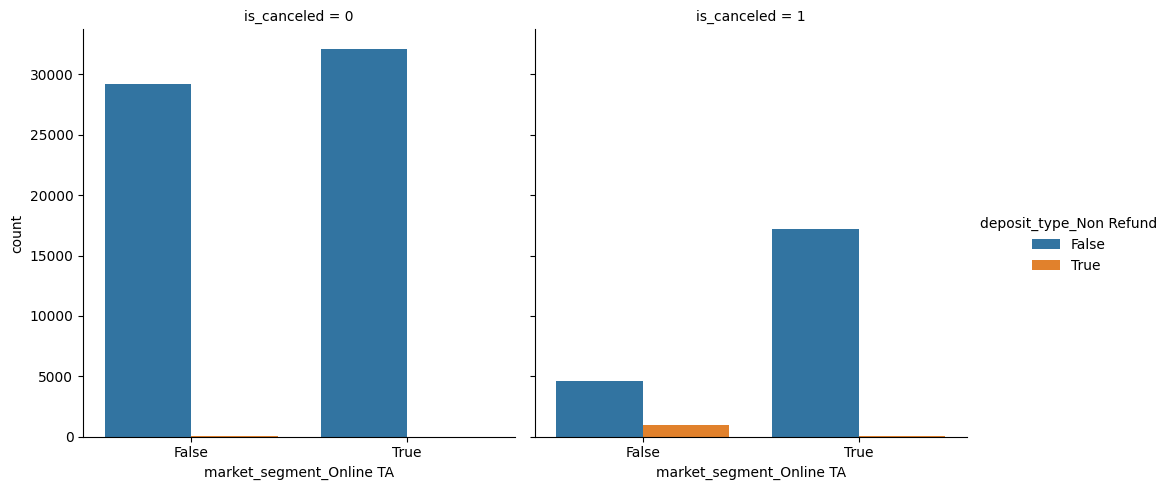

In [372]:
sns.catplot(x='market_segment_Online TA',hue='deposit_type_Non Refund',
            col='is_canceled',kind='count',data=df)

In [374]:
# df.corr()['adr'].sort_values(ascending=False).head()

<Axes: xlabel='lead_time', ylabel='booking_changes'>

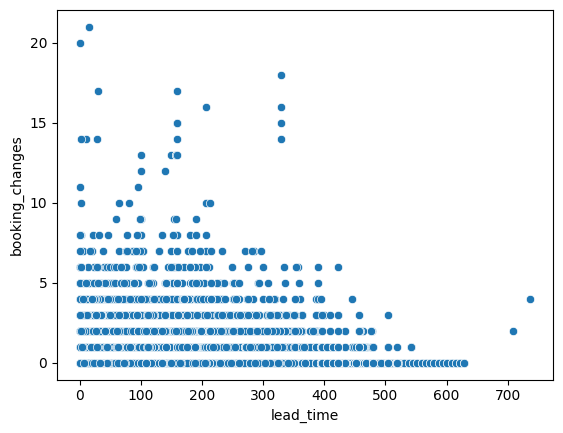

In [368]:
sns.scatterplot(x='lead_time', y='booking_changes', data=df)
# sns.lmplot()

In [376]:
# sns.boxplot(x='grouped_countries', y='adr', data=df)

In [378]:
df['room_upgraded'].value_counts(normalize=True)

room_upgraded
0    0.846485
1    0.153515
Name: proportion, dtype: float64

In [380]:
(df['reserved_room_type'] == df['assigned_room_type']).mean()


0.8464851908107082

In [382]:
df['total_guests'].value_counts().head(10)


total_guests
2.0     55960
1.0     15994
3.0      9354
4.0      2720
0.0       166
5.0        61
26.0        5
12.0        2
27.0        2
20.0        2
Name: count, dtype: int64

In [398]:
# df.groupby('customer_type')[['stay_total_nights', 'lead_time', 'is_canceled']].mean()


In [386]:
df[['lead_time', 'booking_changes', 'is_canceled']].corr()


,lead_time,booking_changes,is_canceled
lead_time,1.000000,0.077106,0.185459
booking_changes,0.077106,1.000000,-0.091660
is_canceled,0.185459,-0.091660,1.000000


In [396]:
# df.groupby('customer_type')['stay_total_nights'].describe()


In [390]:
df['room_upgraded'].mean()


0.1535148091892918

<Axes: xlabel='total_of_special_requests', ylabel='booking_changes'>

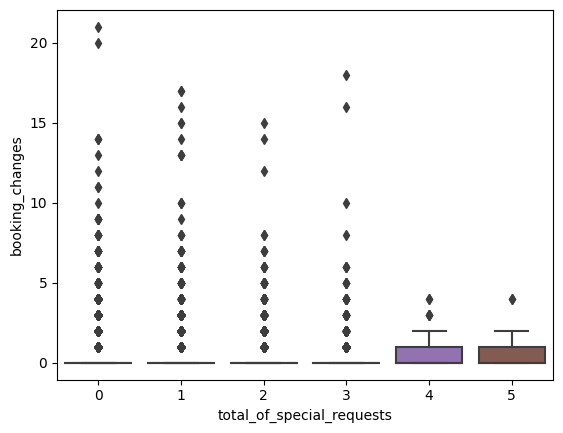

In [392]:
sns.boxplot(x='total_of_special_requests', y='booking_changes', data=df)


In [394]:
df.groupby('booking_changes')[['total_of_special_requests', 'is_canceled']].mean()

,total_of_special_requests,is_canceled
booking_changes,,
0,0.691939,0.297139
1,0.666474,0.134859
2,0.727515,0.198521
3,0.799756,0.146520
4,0.790560,0.176991
5,0.810811,0.180180
6,0.851852,0.314815
7,0.645161,0.096774
8,0.687500,0.250000
